# <center> CASES <center>

# 1. USE CASE: AIRPORT TRAFFIC

Covid 19 must have a major impact on the use of air traffic. Let's try to explore the given air traffic data and check the impact.   
We will use Geopandas and Plotly for the analysis and visualisation. As we already now, by GeoPandas, we can create simple and easy to use geograpycal plots. And by Plotly, we can create an interactive and engaging plots.

## 1.1 IMPORT PACKAGES AND LIBRARIES

In [1]:
from datetime import date
import os

import geopandas as gpd
#import geoplot as gplt
import folium
import mapclassify
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px
import re
import seaborn as sns
from shapely.geometry import Point, Polygon
from shapely.geometry import MultiPolygon

In [2]:
os.chdir(r'C:\\Users\\melanie.vercaempt\\Documents\\Code\\train-keyrus-academy-python\\data-viz')

## 1.2 READ IN THE DATA

In [3]:
covid_impact_on_airport_traffic = pd.read_csv("data/covid_impact_on_airport_traffic.csv")

In [4]:
covid_impact_on_airport_traffic.head()
# With column PercentOfBaseline: Proportion of trips on this date as compared to Avg number of trips on the same day of week 
#                                in baseline period i.e 1st February 2020 - 15th March 2020
#            ISO-3166-2 : code representing Country and Subdivision

AggregationMethod        Date  Version      AirportName  PercentOfBaseline  \
0             Daily  2020-04-03      1.0  Kingsford Smith                 64   
1             Daily  2020-04-13      1.0  Kingsford Smith                 29   
2             Daily  2020-07-10      1.0  Kingsford Smith                 54   
3             Daily  2020-09-02      1.0  Kingsford Smith                 18   
4             Daily  2020-10-31      1.0  Kingsford Smith                 22   

                                    Centroid    City            State  \
0  POINT(151.180087713813 -33.9459774986125)  Sydney  New South Wales   
1  POINT(151.180087713813 -33.9459774986125)  Sydney  New South Wales   
2  POINT(151.180087713813 -33.9459774986125)  Sydney  New South Wales   
3  POINT(151.180087713813 -33.9459774986125)  Sydney  New South Wales   
4  POINT(151.180087713813 -33.9459774986125)  Sydney  New South Wales   

  ISO_3166_2    Country                                          Geography  
0         AU  Australia  POLYGON((151.164354085922 -33.9301772341877, 1...  
1         AU  Australia  POLYGON((151.164354085922 -33.9301772341877, 1...  
2         AU  Australia  POLYGON((151.164354085922 -33.9301772341877, 1...  
3         AU  Australia  POLYGON((151.164354085922 -33.9301772341877, 1...  
4         AU  Australia  POLYGON((151.164354085922 -33.9301772341877, 1...

In [5]:
covid_impact_on_airport_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7247 entries, 0 to 7246
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AggregationMethod  7247 non-null   object 
 1   Date               7247 non-null   object 
 2   Version            7247 non-null   float64
 3   AirportName        7247 non-null   object 
 4   PercentOfBaseline  7247 non-null   int64  
 5   Centroid           7247 non-null   object 
 6   City               7247 non-null   object 
 7   State              7247 non-null   object 
 8   ISO_3166_2         7247 non-null   object 
 9   Country            7247 non-null   object 
 10  Geography          7247 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 622.9+ KB


## 1.3 DATA PREPROCESSING

In [7]:
#1) Date in date format
covid_impact_on_airport_traffic["Date"] = covid_impact_on_airport_traffic["Date"].map(lambda x: date.fromisoformat(x))

In [8]:
#2) Add weekday variable
covid_impact_on_airport_traffic["weekday"] = covid_impact_on_airport_traffic["Date"].map(lambda x: x.weekday())
w_list = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
covid_impact_on_airport_traffic["weekday"] = [w_list[idx] for idx in covid_impact_on_airport_traffic["weekday"]]

In [9]:
covid_impact_on_airport_traffic

AggregationMethod        Date  Version                    AirportName  \
0                Daily  2020-04-03      1.0                Kingsford Smith   
1                Daily  2020-04-13      1.0                Kingsford Smith   
2                Daily  2020-07-10      1.0                Kingsford Smith   
3                Daily  2020-09-02      1.0                Kingsford Smith   
4                Daily  2020-10-31      1.0                Kingsford Smith   
...                ...         ...      ...                            ...   
7242             Daily  2020-06-05      1.0  Seattle-Tacoma International    
7243             Daily  2020-10-03      1.0  Seattle-Tacoma International    
7244             Daily  2020-07-16      1.0  Seattle-Tacoma International    
7245             Daily  2020-07-31      1.0  Seattle-Tacoma International    
7246             Daily  2020-08-30      1.0  Seattle-Tacoma International    

      PercentOfBaseline                                   Centroid    City  \
0                    64  POINT(151.180087713813 -33.9459774986125)  Sydney   
1                    29  POINT(151.180087713813 -33.9459774986125)  Sydney   
2                    54  POINT(151.180087713813 -33.9459774986125)  Sydney   
3                    18  POINT(151.180087713813 -33.9459774986125)  Sydney   
4                    22  POINT(151.180087713813 -33.9459774986125)  Sydney   
...                 ...                                        ...     ...   
7242                 80  POINT(-122.308661576118 47.4505828917119)  SeaTac   
7243                 55  POINT(-122.308661576118 47.4505828917119)  SeaTac   
7244                 76  POINT(-122.308661576118 47.4505828917119)  SeaTac   
7245                 69  POINT(-122.308661576118 47.4505828917119)  SeaTac   
7246                 68  POINT(-122.308661576118 47.4505828917119)  SeaTac   

                State ISO_3166_2                         Country  \
0     New South Wales         AU                       Australia   
1     New South Wales         AU                       Australia   
2     New South Wales         AU                       Australia   
3     New South Wales         AU                       Australia   
4     New South Wales         AU                       Australia   
...               ...        ...                             ...   
7242       Washington      US-WA  United States of America (the)   
7243       Washington      US-WA  United States of America (the)   
7244       Washington      US-WA  United States of America (the)   
7245       Washington      US-WA  United States of America (the)   
7246       Washington      US-WA  United States of America (the)   

                                              Geography weekday  
0     POLYGON((151.164354085922 -33.9301772341877, 1...     Fri  
1     POLYGON((151.164354085922 -33.9301772341877, 1...     Mon  
2     POLYGON((151.164354085922 -33.9301772341877, 1...     Fri  
3     POLYGON((151.164354085922 -33.9301772341877, 1...     Wed  
4     POLYGON((151.164354085922 -33.9301772341877, 1...     Sat  
...                                                 ...     ...  
7242  POLYGON((-122.297594547272 47.434474106872, -1...     Fri  
7243  POLYGON((-122.297594547272 47.434474106872, -1...     Sat  
7244  POLYGON((-122.297594547272 47.434474106872, -1...     Thu  
7245  POLYGON((-122.297594547272 47.434474106872, -1...     Fri  
7246  POLYGON((-122.297594547272 47.434474106872, -1...     Sun  

[7247 rows x 12 columns]

Centroid column has Latitude and longitude data as Point object, but it seems to be string. So, I'll cut out Latitude and longitude.

In [10]:
#3) 
def cut_long(point):
    #point is like 'POINT(151.180087713813 -33.9459774986125)'
    long, _ = point[6:-1].split(" ")
    return float(long)

def cut_lat(point):
    #point is like 'POINT(151.180087713813 -33.9459774986125)'
    _, lat = point[6:-1].split(" ")
    return float(lat)

covid_impact_on_airport_traffic["long"] = covid_impact_on_airport_traffic["Centroid"].map(cut_long)
covid_impact_on_airport_traffic["lat"] = covid_impact_on_airport_traffic["Centroid"].map(cut_lat)

In [11]:
covid_impact_on_airport_traffic.columns

Index(['AggregationMethod', 'Date', 'Version', 'AirportName',
       'PercentOfBaseline', 'Centroid', 'City', 'State', 'ISO_3166_2',
       'Country', 'Geography', 'weekday', 'long', 'lat'],
      dtype='object')

In [13]:
#4) Only keep the columns that we need for our analysis
need_columns = [col for col in covid_impact_on_airport_traffic.columns if not col in ["AggregationMethod", "Version", "Centroid"]]
covid_impact_on_airport_traffic = covid_impact_on_airport_traffic[need_columns]

In [14]:
covid_impact_on_airport_traffic.head()

Date      AirportName  PercentOfBaseline    City            State  \
0  2020-04-03  Kingsford Smith                 64  Sydney  New South Wales   
1  2020-04-13  Kingsford Smith                 29  Sydney  New South Wales   
2  2020-07-10  Kingsford Smith                 54  Sydney  New South Wales   
3  2020-09-02  Kingsford Smith                 18  Sydney  New South Wales   
4  2020-10-31  Kingsford Smith                 22  Sydney  New South Wales   

  ISO_3166_2    Country                                          Geography  \
0         AU  Australia  POLYGON((151.164354085922 -33.9301772341877, 1...   
1         AU  Australia  POLYGON((151.164354085922 -33.9301772341877, 1...   
2         AU  Australia  POLYGON((151.164354085922 -33.9301772341877, 1...   
3         AU  Australia  POLYGON((151.164354085922 -33.9301772341877, 1...   
4         AU  Australia  POLYGON((151.164354085922 -33.9301772341877, 1...   

  weekday        long        lat  
0     Fri  151.180088 -33.945977  
1     Mon  151.180088 -33.945977  
2     Fri  151.180088 -33.945977  
3     Wed  151.180088 -33.945977  
4     Sat  151.180088 -33.945977

In [15]:
#5) We will make a data frame that makes the airport name unique so we can easily see data for each airport
covid_impact_on_airport_traffic_unique = covid_impact_on_airport_traffic[~covid_impact_on_airport_traffic[["AirportName"]].duplicated()].reset_index(drop=True)
covid_impact_on_airport_traffic_unique

Date                                AirportName  PercentOfBaseline  \
0   2020-04-03                            Kingsford Smith                 64   
1   2020-03-17             Santiago International Airport                 72   
2   2020-04-05                      Calgary International                 65   
3   2020-04-20                     Edmonton International                 46   
4   2020-05-15                    Vancouver International                 68   
5   2020-05-27                     Winnipeg International                100   
6   2020-03-29                      Halifax International                 32   
7   2020-04-10                            Toronto Pearson                 10   
8   2020-08-10                     Hamilton International                100   
9   2020-09-16                           Montreal Mirabel                100   
10  2020-05-04                           Montreal Trudeau                 67   
11  2020-06-22                  Los Angeles International                 63   
12  2020-04-20                San Francisco International                 46   
13  2020-06-14                       Denver International                 30   
14  2020-04-18                       Miami International                  60   
15  2020-04-20  Hartsfield-Jackson Atlanta International                  51   
16  2020-05-16            Daniel K. Inouye International                  73   
17  2020-03-23                Chicago OHare International                 75   
18  2020-04-03                Boston Logan International                  56   
19  2020-04-08         Detroit Metropolitan Wayne County                  49   
20  2020-07-23            Charlotte Douglas International                100   
21  2020-08-07              Newark Liberty International                 100   
22  2020-04-26                     McCarran International                 22   
23  2020-03-16                                  LaGuardia                 95   
24  2020-05-26              John F. Kennedy International                 53   
25  2020-03-21           Dallas/Fort Worth International                  71   
26  2020-06-11           Washington Dulles International                  53   
27  2020-04-14              Seattle-Tacoma International                  62   

                   City              State ISO_3166_2  \
0                Sydney    New South Wales         AU   
1              Santiago  Santiago Province         CL   
2               Calgary            Alberta      CA-AB   
3          Leduc County            Alberta      CA-AB   
4              Richmond   British Columbia      CA-BC   
5              Winnipeg           Manitoba      CA-MB   
6               Halifax        Nova Scotia      CA-NS   
7           Mississauga            Ontario      CA-ON   
8              Hamilton            Ontario      CA-ON   
9               Mirabel             Quebec      CA-QC   
10               Dorval             Quebec      CA-QC   
11          Los Angeles         California      US-CA   
12  South San Francisco         California      US-CA   
13               Denver           Colorado      US-CO   
14        Miami Springs            Florida      US-FL   
15         College Park            Georgia      US-GA   
16       Urban Honolulu             Hawaii      US-HI   
17              Chicago           Illinois      US-IL   
18               Boston      Massachusetts      US-MA   
19              Romulus           Michigan      US-MI   
20            Charlotte     North Carolina      US-NC   
21               Newark         New Jersey      US-NJ   
22             Paradise             Nevada      US-NV   
23             New York           New York      US-NY   
24             New York           New York      US-NY   
25            Grapevine              Texas      US-TX   
26               Floris           Virginia      US-VA   
27               SeaTac         Washington      US-WA   

                           Country 

In [16]:
df_geometry = covid_impact_on_airport_traffic_unique[['AirportName', 'City', 'State',
                                                     'ISO_3166_2', 'Country', 'long', 'lat']]

## 1.4 DATA OVERVIEW

In [17]:
def visualize_airport_map(df,  zoom):
    
    lat_map=30.038557
    lon_map=31.231781
    f = folium.Figure(width=1000, height=500)
    m = folium.Map([lat_map,lon_map], zoom_start=zoom).add_to(f)
        
    for i in range(0,len(df)):
        folium.Marker(location=[df["lat"][i],df["long"][i]],icon=folium.Icon(icon_color='white',icon ='plane',prefix='fa')).add_to(m)
        
    return m

In [18]:
visualize_airport_map(covid_impact_on_airport_traffic_unique, 1)


Most of them are in North America.

Also you can easily look up the name and geographic information of the area where the airport is located.

Let's check out the pie chart to see how many records there are for each country.

Text(0.5, 1.0, 'records for each country')

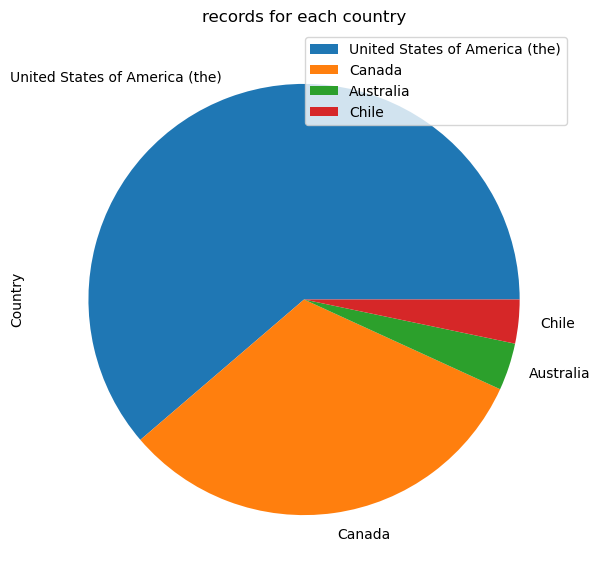

In [16]:
df_Country_count = pd.DataFrame(covid_impact_on_airport_traffic["Country"].value_counts())
g = df_Country_count.plot.pie(y='Country', figsize=(7, 7))
g.set_title("records for each country")

Let's also count the number of records per airport. The number of records at each airport is roughly the same.

Text(0.5, 1.0, 'records for each airport')

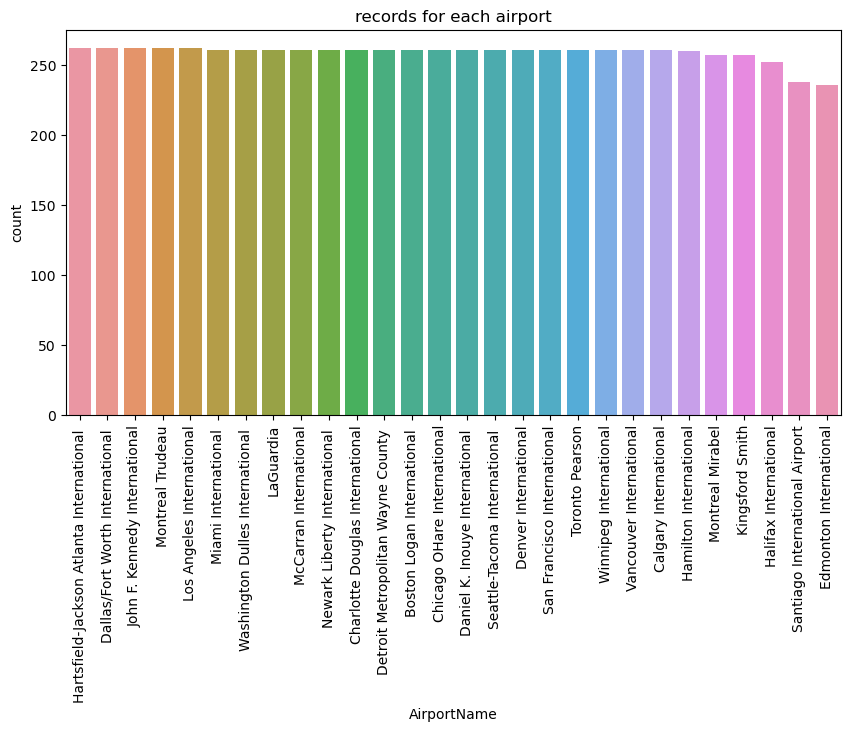

In [17]:
plt.figure(figsize=(10, 5))
g = sns.countplot(data=covid_impact_on_airport_traffic, x="AirportName",
              order = covid_impact_on_airport_traffic['AirportName'].value_counts().index)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title("records for each airport")

Let's also count the number of records per month. The numbers of records between April to September are roughly the same, but March and October are less.

Text(0.5, 1.0, 'records for each month')

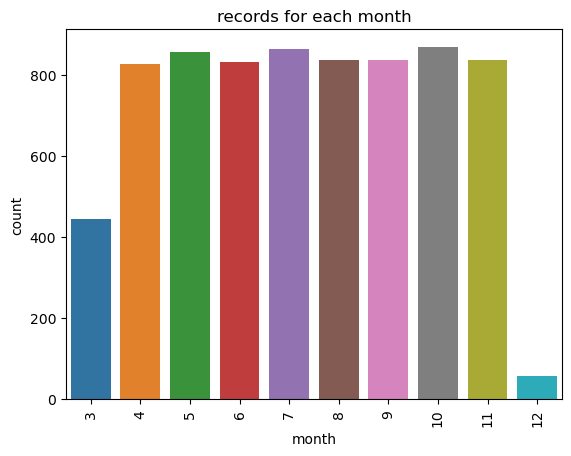

In [18]:
df_month_count = pd.DataFrame(covid_impact_on_airport_traffic["Date"].map(lambda d: d.month).value_counts())
df_month_count = df_month_count.reset_index()
df_month_count = df_month_count.rename(columns={"Date":"count", "index":"month"})
g = sns.barplot(data=df_month_count.reset_index(), y="count", x="month")
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title("records for each month")

Finally, check the weekday rates. If you look at the pie chart, you can see that it is roughly the same

Text(0.5, 1.0, 'records for each weekday')

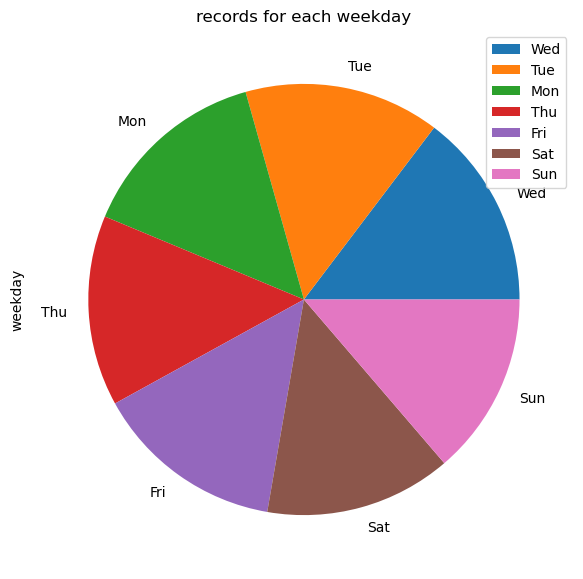

In [19]:
df_weekday_count = pd.DataFrame(covid_impact_on_airport_traffic["weekday"].value_counts())
g = df_weekday_count.plot.pie(y='weekday', figsize=(7, 7))
g.set_title("records for each weekday")

## 1.5 Visualize with Geopandas

<AxesSubplot:>

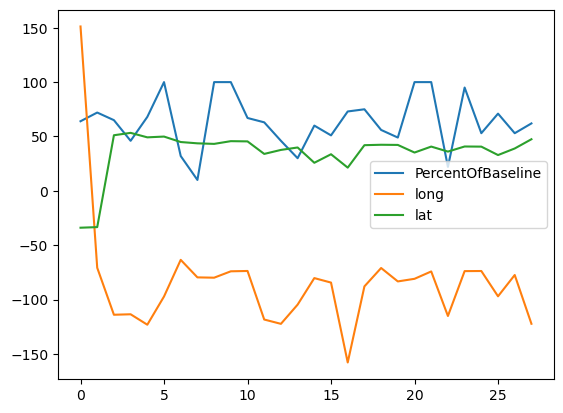

In [20]:
covid_impact_on_airport_traffic_unique.plot()
#This does not work as we don't have a "geometry" columns

In [21]:
#Therefore, we will create GeoDataFrame. When create, we can create a column of Point instances by specifying "geometry" argument.  
gdf = gpd.GeoDataFrame(covid_impact_on_airport_traffic_unique, 
                       geometry=gpd.points_from_xy(covid_impact_on_airport_traffic_unique.long, covid_impact_on_airport_traffic_unique.lat))

<AxesSubplot:>

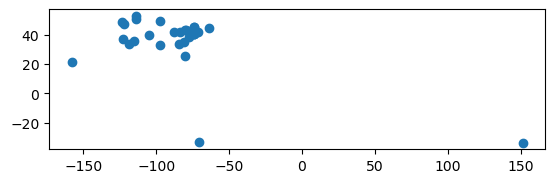

In [22]:
# Now we can plot is, but it does not say anything
gdf.plot()

In [23]:
#Therefore we include the GeoDataFrame which includes world map data.
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

pop_est      continent                      name iso_a3  gdp_md_est  \
0     889953.0        Oceania                      Fiji    FJI        5496   
1   58005463.0         Africa                  Tanzania    TZA       63177   
2     603253.0         Africa                 W. Sahara    ESH         907   
3   37589262.0  North America                    Canada    CAN     1736425   
4  328239523.0  North America  United States of America    USA    21433226   

                                            geometry  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...

Text(0.5, 1.0, 'example world map')

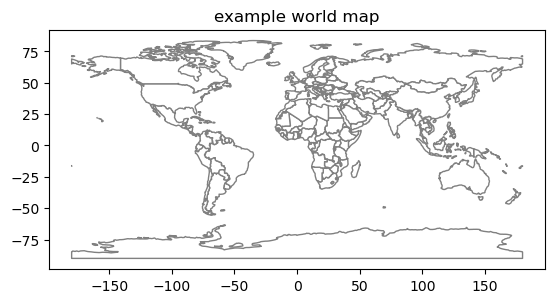

In [24]:
#Now we can plot the world map 
g = world.plot(color='white', edgecolor='gray')
g.set_title("example world map")

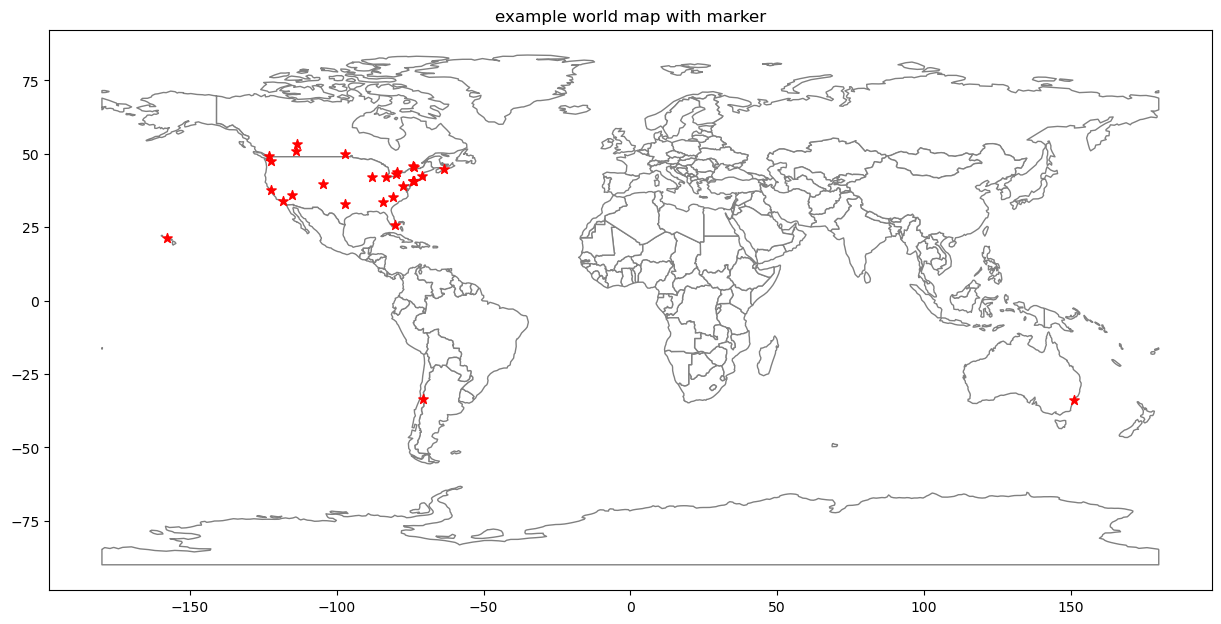

In [25]:
# And we can plot both tables into one visualisation
ax = world.plot(color='white', edgecolor='gray', figsize=(15, 10))
g = gdf.plot(ax=ax, marker='*', color='red', markersize=50)
g.set_title("example world map with marker")
plt.show()

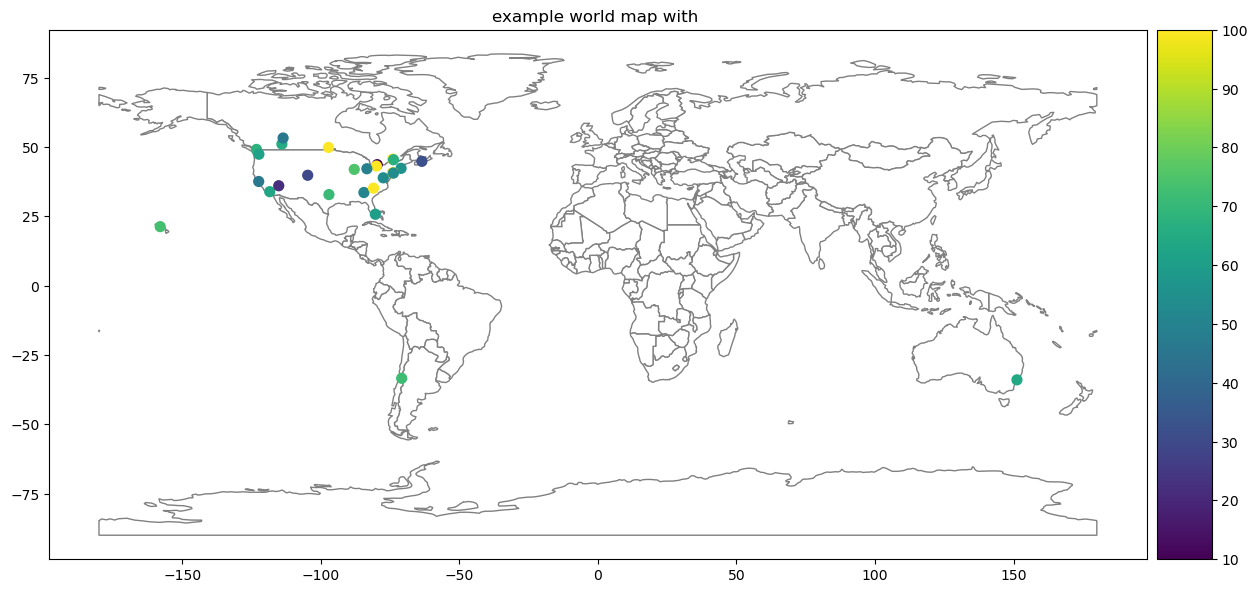

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

world.plot(ax=ax, color='white', edgecolor='gray')
g = gdf.plot(column='PercentOfBaseline', ax=ax, markersize=50, legend=True, cax=cax)
g.set_title("example world map with ")
plt.show()

covid_impact_on_airport_traffic_unique was a dataframe that we created appropriately so that the airport's information would be unique. So the map doesn't mean much.

Next, let's try to visualize it with meaningful data.

## Average per weekday

First, I'll average "PercentOfBaseline" across specified weekday.

The airport and day of the week are used as a composite key, averaged and combined with geographic data to create data to be visualized.

In [27]:
df_airport_weekday_mean = covid_impact_on_airport_traffic[["AirportName", "weekday", "PercentOfBaseline"]].groupby(["AirportName", "weekday"]).mean()
df_airport_weekday_mean = df_airport_weekday_mean.reset_index()
df_airport_weekday_mean = df_airport_weekday_mean.merge(df_geometry, on="AirportName")

In [28]:
df_airport_weekday_mean.head()

AirportName weekday  PercentOfBaseline    City  \
0  Boston Logan International      Fri          63.567568  Boston   
1  Boston Logan International      Mon          64.162162  Boston   
2  Boston Logan International      Sat          62.432432  Boston   
3  Boston Logan International      Sun          63.351351  Boston   
4  Boston Logan International      Thu          61.432432  Boston   

           State ISO_3166_2                         Country       long  \
0  Massachusetts      US-MA  United States of America (the) -71.010291   
1  Massachusetts      US-MA  United States of America (the) -71.010291   
2  Massachusetts      US-MA  United States of America (the) -71.010291   
3  Massachusetts      US-MA  United States of America (the) -71.010291   
4  Massachusetts      US-MA  United States of America (the) -71.010291   

         lat  
0  42.363633  
1  42.363633  
2  42.363633  
3  42.363633  
4  42.363633

Let's extract the data of Sunday and visualize

In [29]:
df_airport_weekday_mean_sun = df_airport_weekday_mean[df_airport_weekday_mean["weekday"]=="Sun"]
gdf_airport_weekday_mean_sun = gpd.GeoDataFrame(df_airport_weekday_mean_sun, 
                                                geometry=gpd.points_from_xy(df_airport_weekday_mean_sun.long, df_airport_weekday_mean_sun.lat))

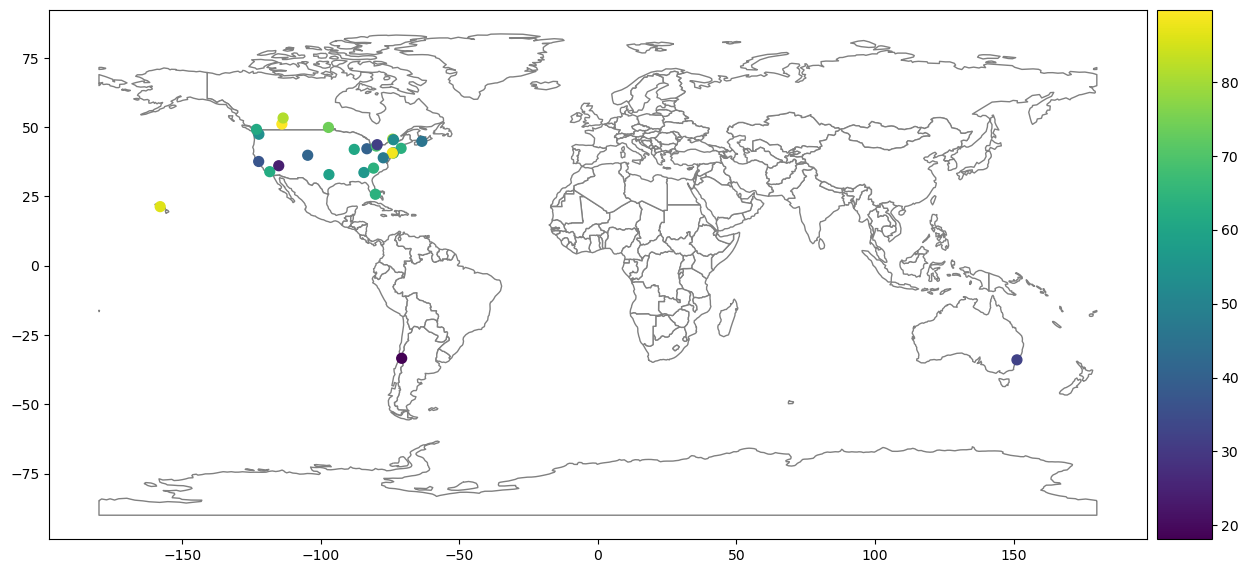

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

world.plot(ax=ax, color='white', edgecolor='gray')
gdf_airport_weekday_mean_sun.plot(column='PercentOfBaseline', ax=ax, markersize=50, legend=True, cax=cax)
plt.show()

You can do this for every weekday. Let's try it out per month. What is the percent of baseline for May?

In [31]:
df_airport_date_mean = covid_impact_on_airport_traffic[["AirportName", "Date", "PercentOfBaseline"]]
df_airport_date_mean["Date"] = df_airport_date_mean["Date"].map(lambda d: d.month)
df_airport_date_mean = df_airport_date_mean.groupby(["AirportName", "Date"]).mean()
df_airport_date_mean = df_airport_date_mean.reset_index()
df_airport_date_mean = df_airport_date_mean.merge(df_geometry, on="AirportName")
df_airport_date_mean = df_airport_date_mean.rename(columns={"Date": "month"})

C:\Users\melanie.vercaempt\AppData\Local\Temp\ipykernel_10876\2011692645.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_airport_date_mean["Date"] = df_airport_date_mean["Date"].map(lambda d: d.month)


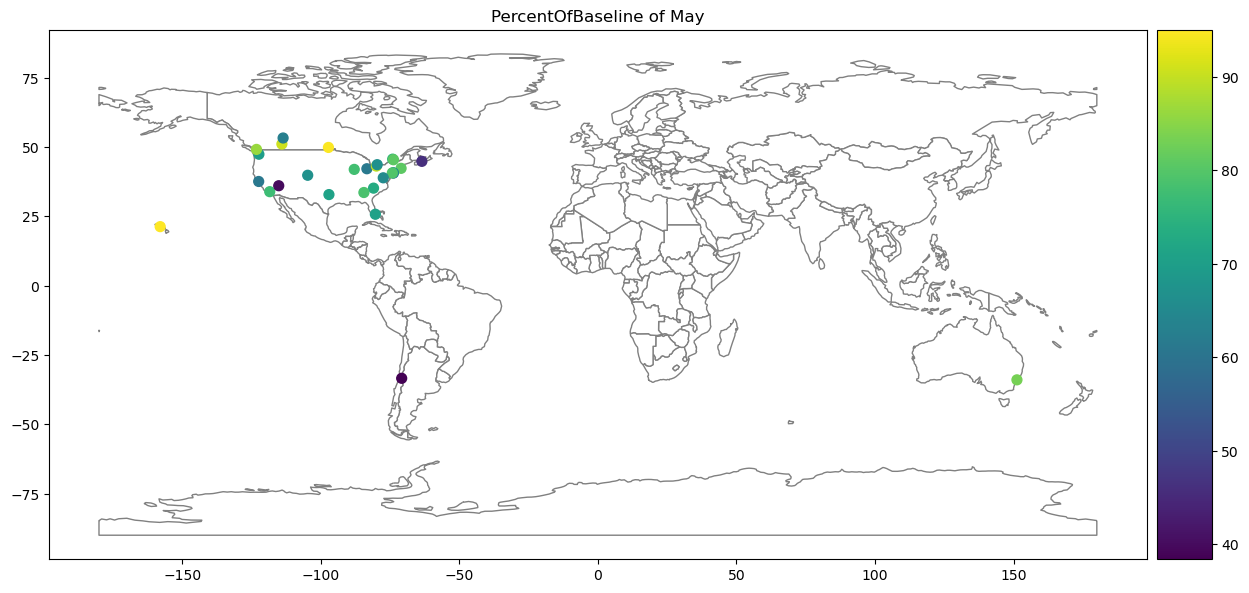

In [32]:
df_airport_date_mean_3 = df_airport_date_mean[df_airport_date_mean["month"]==3]
df_airport_date_mean_3 = gpd.GeoDataFrame(df_airport_date_mean_3, 
                                                geometry=gpd.points_from_xy(df_airport_date_mean_3.long, df_airport_date_mean_3.lat))

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

world.plot(ax=ax, color='white', edgecolor='gray')
g = df_airport_date_mean_3.plot(column='PercentOfBaseline', ax=ax, markersize=50, legend=True, cax=cax)
g.set_title("PercentOfBaseline of May")
plt.show()

## 1.6 Visualize with Plotly

Using scatter_mapbox function of Plotly express, we can also easily create interactive geographic plots.

So far, we have looked at detailed data by month and weekday, but here, let's visualize the total data by airport name.

In [19]:
df_airport_date_all_mean = covid_impact_on_airport_traffic.groupby(["AirportName"]).mean()
df_airport_date_all_mean = df_airport_date_all_mean.reset_index()

In [20]:
df_airport_date_all_mean.head()

AirportName  PercentOfBaseline        long        lat
0       Boston Logan International           64.704981  -71.010291  42.363633
1             Calgary International          89.513410 -114.013123  51.118475
2   Charlotte Douglas International          75.375479  -80.947811  35.213689
3       Chicago OHare International          73.084291  -87.910595  41.980460
4  Dallas/Fort Worth International           75.293893  -97.039498  32.894059

Let's visualize the Percent of baseline per airport using plotly express

In [21]:
fig = px.scatter_mapbox(df_airport_date_all_mean,
                        lat="lat", #By specifying lat and lon, we can specify the position of the markers
                        lon="long",
                        hover_name="AirportName",
                        hover_data=["PercentOfBaseline"],
                        color="PercentOfBaseline", #we can change the color and size of the marker to match the size of the data
                        zoom=1,
                        height=600,
                        size="PercentOfBaseline",
                        size_max=30,
                        opacity=0.4,
                        width=1300)
fig.update_layout(mapbox_style='stamen-terrain') #by setting mapbox_style to 'stimen-terrain', it is possible to depict data on a map that shows geographic features in color.
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.update_layout(title_text="Mean of trafic on sunday")
fig.show()

Find out what visualisation you get when changing the mapbox_style to 'carto-positron'

In [22]:
fig = px.scatter_mapbox(df_airport_date_all_mean,
                        lat="lat", #By specifying lat and lon, we can specify the position of the markers
                        lon="long",
                        hover_name="AirportName",
                        hover_data=["PercentOfBaseline"],
                        color="PercentOfBaseline", #we can change the color and size of the marker to match the size of the data
                        zoom=1,
                        height=600,
                        size="PercentOfBaseline",
                        size_max=30,
                        opacity=0.4,
                        width=1300)
fig.update_layout(mapbox_style='carto-positron') #by setting mapbox_style to 'stimen-terrain', it is possible to depict data on a map that shows geographic features in color.
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.update_layout(title_text="Mean of trafic on sunday")
fig.show()

Disadvantages of plotly for geodata:
- if you create a large number of plots, some plots will become impossible to display
- if you plot a large amount of data, it will take a long time to load when you save and view it from a browser.

Advantages of plotly for geodata:
- very useful and powerful function for geographical visualization. 
- Best way to display geographic data in such an interactive and attractive way.

# 2. FIFA EDA

## 2.1 IMPORT PACKAGES AND LIBRARIES

In [37]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


## 2.2 READ IN THE DATA

In [38]:
fifa=pd.read_csv("data/fifa.csv")

In [39]:
fifa.head()

ID               Name  Age Nationality  Overall  Potential  \
0  158023           L. Messi   31   Argentina       94         94   
1   20801  Cristiano Ronaldo   33    Portugal       94         94   
2  190871          Neymar Jr   26      Brazil       92         93   
3  193080             De Gea   27       Spain       91         93   
4  192985       K. De Bruyne   27     Belgium       91         92   

                  Club     Value   Wage Preferred Foot  \
0         FC Barcelona  110500.0  565.0           Left   
1             Juventus   77000.0  405.0          Right   
2  Paris Saint-Germain  118500.0  290.0          Right   
3    Manchester United   72000.0  260.0          Right   
4      Manchester City  102000.0  355.0          Right   

   International Reputation  Skill Moves Position  Joined  \
0                       5.0          4.0       RF    2004   
1                       5.0          5.0       ST    2018   
2                       5.0          5.0       LW    2017   
3                       4.0          1.0       GK    2011   
4                       4.0          4.0      RCM    2015   

  Contract Valid Until    Height  Weight  Release Clause  
0           2021-01-01  5.583333   159.0        226500.0  
1           2022-01-01  6.166667   183.0        127100.0  
2           2022-01-01  5.750000   150.0        228100.0  
3           2020-01-01  6.333333   168.0        138600.0  
4           2023-01-01  5.916667   154.0        196400.0

In [40]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Nationality               18207 non-null  object 
 4   Overall                   18207 non-null  int64  
 5   Potential                 18207 non-null  int64  
 6   Club                      17966 non-null  object 
 7   Value                     17955 non-null  float64
 8   Wage                      18207 non-null  float64
 9   Preferred Foot            18207 non-null  object 
 10  International Reputation  18159 non-null  float64
 11  Skill Moves               18159 non-null  float64
 12  Position                  18207 non-null  object 
 13  Joined                    18207 non-null  int64  
 14  Contra

## 2.2 DATA PREPROCESSING

In [41]:
##1) Change date type
fifa["Contract Valid Until"] = pd.to_datetime(fifa['Contract Valid Until'])
fifa["Contract Valid Until"].max()

Timestamp('2026-01-01 00:00:00')

<AxesSubplot:>

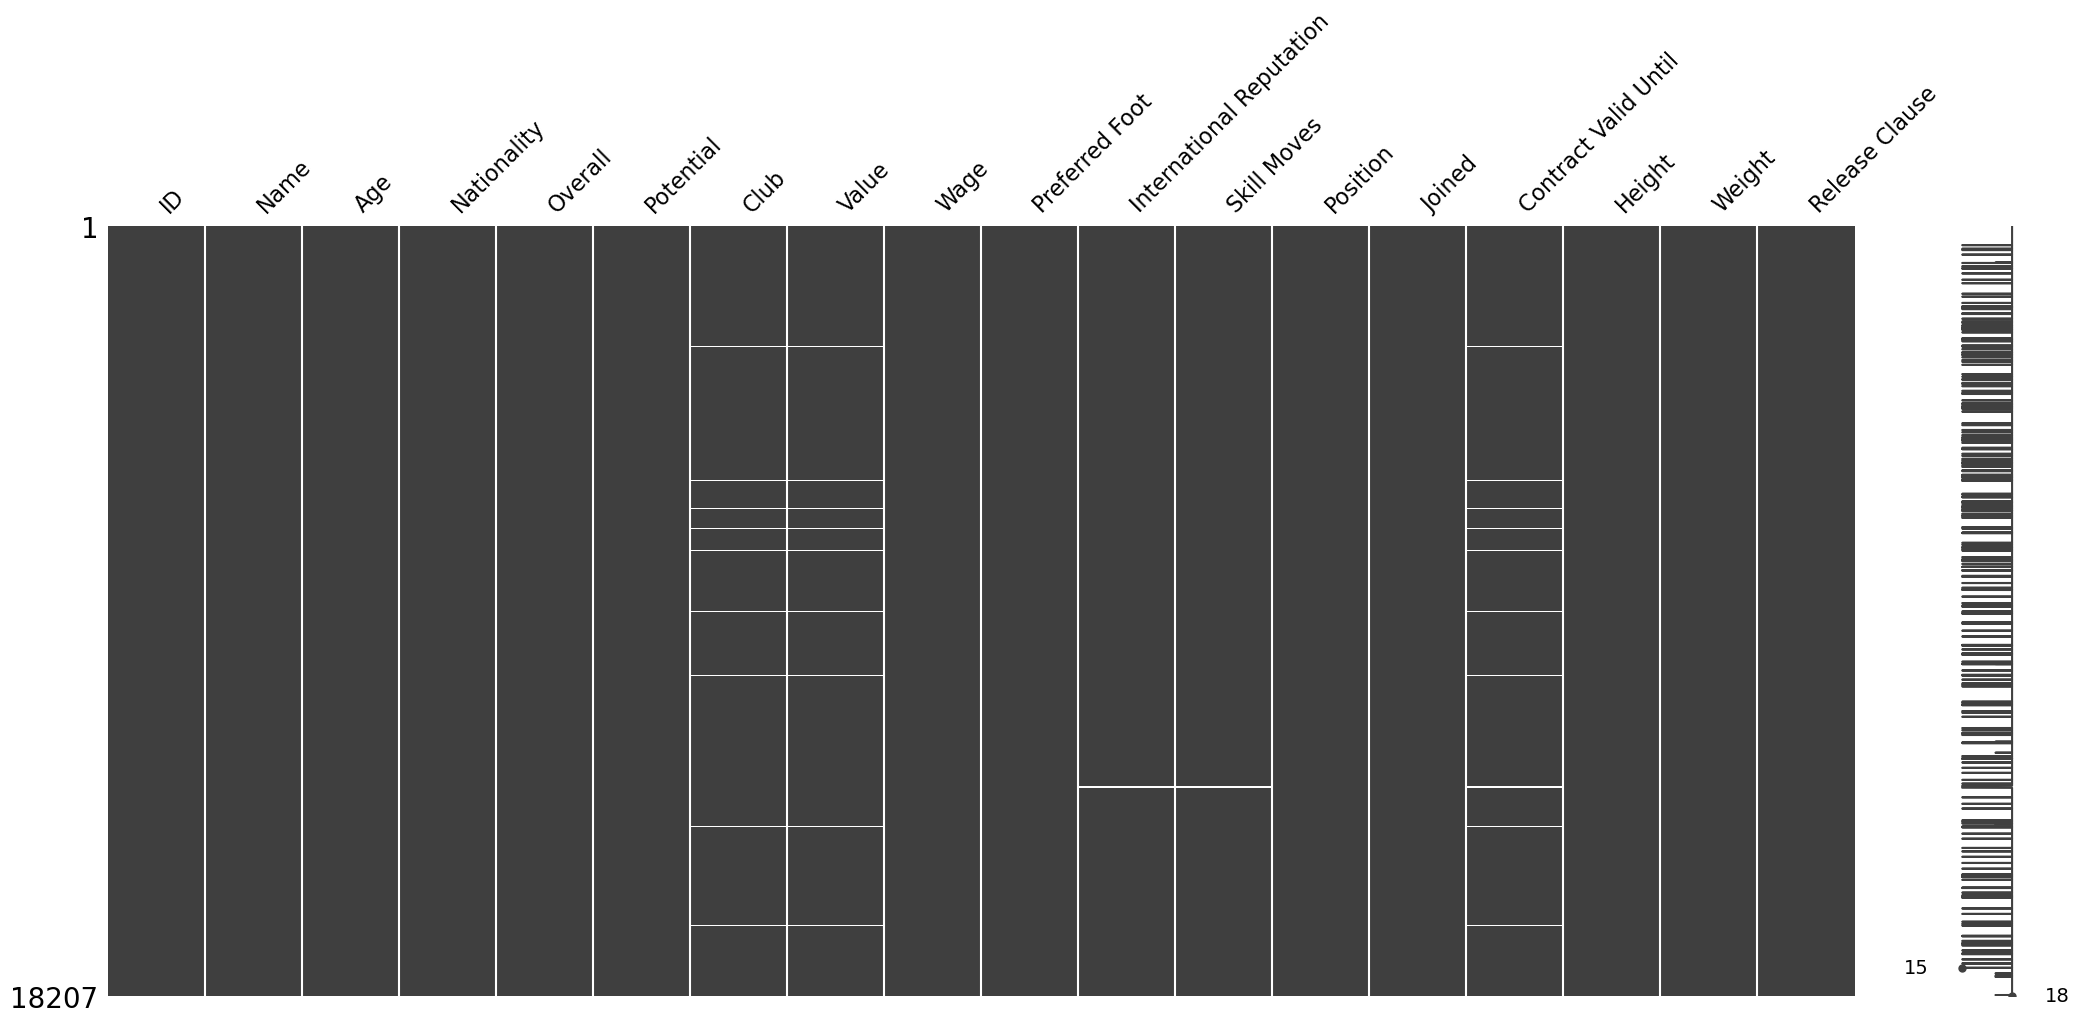

In [43]:
##2) Look at the null values
# 2.1) 
import missingno as msno
msno.matrix(fifa)

In [44]:
## 2.2) 
fifa.isnull().sum()

ID                            0
Name                          0
Age                           0
Nationality                   0
Overall                       0
Potential                     0
Club                        241
Value                       252
Wage                          0
Preferred Foot                0
International Reputation     48
Skill Moves                  48
Position                      0
Joined                        0
Contract Valid Until        289
Height                        0
Weight                        0
Release Clause                0
dtype: int64

Let's focus on CLUB, International Reputation, Skill Moves , Contract Valid Until and VALUE columns first.  
If all columns have null values present then we will remove it.

In [45]:
fifa_check = fifa.copy()
fifa_check["compare"] = np.where(fifa_check["Value"].isna()
                              & fifa_check["Club"].isna()
                              & fifa_check["International Reputation"].isna()
                              & fifa_check["Skill Moves"].isna()
                              & fifa_check["Contract Valid Until"].isna() , "remove it" , "don't remove it")
fifa_check[fifa_check["compare"] == "remove it"]

Empty DataFrame
Columns: [ID, Name, Age, Nationality, Overall, Potential, Club, Value, Wage, Preferred Foot, International Reputation, Skill Moves, Position, Joined, Contract Valid Until, Height, Weight, Release Clause, compare]
Index: []

We see there are no rows for these columns where there are only null values.   
Now let's do it again for CLUB, Contract Valid Until,and VALUE columns first.  
If all three columns have null values present then we assign some values to it because it might happen that  a player has not been assigned to any club.

In [46]:
fifa_club_value_contract = fifa.copy()
fifa_club_value_contract["compare"] = np.where(fifa_club_value_contract["Value"].isna()
                              & fifa_club_value_contract["Club"].isna() 
                              & fifa_club_value_contract["Contract Valid Until"].isna(),
                              "remove it" , "don't remove it")


fifa_club_value_contract_NULL= fifa_club_value_contract[fifa_club_value_contract["compare"] == "remove it"]
fifa_club_value_contract_NULL

ID            Name  Age Nationality  Overall  Potential Club  \
452    207439      L. Paredes   24   Argentina       80         85  NaN   
538    156713    A. Granqvist   33      Sweden       80         80  NaN   
568    229909        A. Lunev   26      Russia       79         81  NaN   
677    187347    I. Smolnikov   29      Russia       79         79  NaN   
874    187607       A. Dzyuba   29      Russia       78         78  NaN   
...       ...             ...  ...         ...      ...        ...  ...   
17197  245164        V. Kaith   21       India       55         64  NaN   
17215  243131        K. Taimi   26     Finland       55         57  NaN   
17339  233526        S. Passi   23       India       54         63  NaN   
17436  236452  D. Lalhlimpuia   20       India       54         67  NaN   
17539  234508        C. Singh   21       India       53         62  NaN   

       Value  Wage Preferred Foot  International Reputation  Skill Moves  \
452      NaN   0.0          Right                       2.0          4.0   
538      NaN   0.0          Right                       2.0          2.0   
568      NaN   0.0          Right                       1.0          1.0   
677      NaN   0.0          Right                       2.0          3.0   
874      NaN   0.0          Right                       2.0          3.0   
...      ...   ...            ...                       ...          ...   
17197    NaN   0.0          Right                       1.0          1.0   
17215    NaN   0.0          Right                       1.0          2.0   
17339    NaN   0.0          Right                       1.0          2.0   
17436    NaN   0.0          Right                       1.0          2.0   
17539    NaN   0.0          Right                       1.0          2.0   

      Position  Joined Contract Valid Until    Height  Weight  Release Clause  \
452         CM    2016                  NaT  5.916667   165.0     4585.060806   
538        LCB    2016                  NaT  6.333333   185.0     4585.060806   
568         GK    2016                  NaT  6.166667   176.0     4585.060806   
677         RB    2016                  NaT  5.833333   154.0     4585.060806   
874         ST    2016                  NaT  6.416667   201.0     4585.060806   
...        ...     ...                  ...       ...     ...             ...   
17197       GK    2016                  NaT  6.166667   176.0     4585.060806   
17215       RB    2016                  NaT  6.333333   187.0     4585.060806   
17339       RM    2016                  NaT  5.750000   143.0     4585.060806   
17436       GK    2016                  NaT  6.000000   168.0     4585.060806   
17539       LB    2016                  NaT  6.250000   174.0     4585.060806   

         compare  
452    remove it  
538    remove it  
568    remove it  
677    remove it  
874    remove it  
...          ...  
17197  remove it  
17215  remove it  
17339  remove it  
17436  remove it  
17539  remove it  

[241 rows x 19 columns]

We see 241 rows with null values. We want to fill in the NaN values so we can do our EDA properly.

In [49]:
for ID in fifa_club_value_contract_NULL['ID']:
    fifa.loc[fifa["ID"] == ID,"Club"] = "Not Assigned"
    fifa.loc[fifa["ID"] == ID,"Value"] = 0.0
    fifa.loc[fifa["ID"] == ID,"Contract Valid Until"] = pd.to_datetime("today").strftime("%m/%d/%Y")

In [50]:
#let's check: 
fifa[fifa["ID"]== 207439]

ID        Name  Age Nationality  Overall  Potential          Club  \
452  207439  L. Paredes   24   Argentina       80         85  Not Assigned   

     Value  Wage Preferred Foot  International Reputation  Skill Moves  \
452    0.0   0.0          Right                       2.0          4.0   

    Position  Joined Contract Valid Until    Height  Weight  Release Clause  
452       CM    2016           2023-03-13  5.916667   165.0     4585.060806

In [51]:
fifa.isnull().sum()

ID                           0
Name                         0
Age                          0
Nationality                  0
Overall                      0
Potential                    0
Club                         0
Value                       11
Wage                         0
Preferred Foot               0
International Reputation    48
Skill Moves                 48
Position                     0
Joined                       0
Contract Valid Until        48
Height                       0
Weight                       0
Release Clause               0
dtype: int64

In [52]:
# Let's remove all rest of the NULL values present
fifa.dropna(inplace=True)

## 2.3 EXPLANATORY DATA ANALYSIS

In [53]:
fifa.head()

ID               Name  Age Nationality  Overall  Potential  \
0  158023           L. Messi   31   Argentina       94         94   
1   20801  Cristiano Ronaldo   33    Portugal       94         94   
2  190871          Neymar Jr   26      Brazil       92         93   
3  193080             De Gea   27       Spain       91         93   
4  192985       K. De Bruyne   27     Belgium       91         92   

                  Club     Value   Wage Preferred Foot  \
0         FC Barcelona  110500.0  565.0           Left   
1             Juventus   77000.0  405.0          Right   
2  Paris Saint-Germain  118500.0  290.0          Right   
3    Manchester United   72000.0  260.0          Right   
4      Manchester City  102000.0  355.0          Right   

   International Reputation  Skill Moves Position  Joined  \
0                       5.0          4.0       RF    2004   
1                       5.0          5.0       ST    2018   
2                       5.0          5.0       LW    2017   
3                       4.0          1.0       GK    2011   
4                       4.0          4.0      RCM    2015   

  Contract Valid Until    Height  Weight  Release Clause  
0           2021-01-01  5.583333   159.0        226500.0  
1           2022-01-01  6.166667   183.0        127100.0  
2           2022-01-01  5.750000   150.0        228100.0  
3           2020-01-01  6.333333   168.0        138600.0  
4           2023-01-01  5.916667   154.0        196400.0

**What is the correlation between all the columns?**

In [54]:
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sb

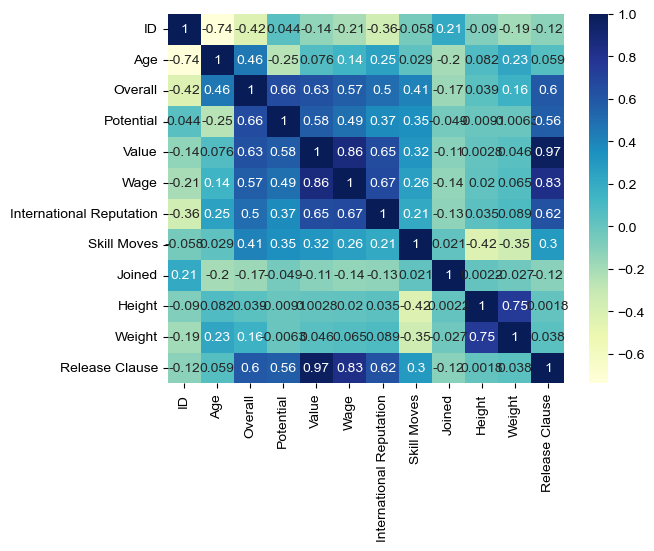

In [57]:
dataplot = sb.heatmap(fifa.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
sb.set(rc = {'figure.figsize':(20,8)})
mp.show()

What we see:

- There is strong correlation between Internation Reputation and Wage.
- Skill Moves has NEGATIVE correlation with HEIGHT and WEIGHT. It means more heighted or more weighted the player is lesser SKILL MOVES he will have.
- AGE has little bit positive correlation with WAGE.
- Whereas AGE has strong NEGATIVE CORRELATION with POTENTIAL but POSTIVE CORRELATION with OVERALL rating.
- OVERALL RATING has strong POSITIVE CORRELATION with WAGE and RELEASE CLAUSE>


**Which players are amongst the highers paid players?**

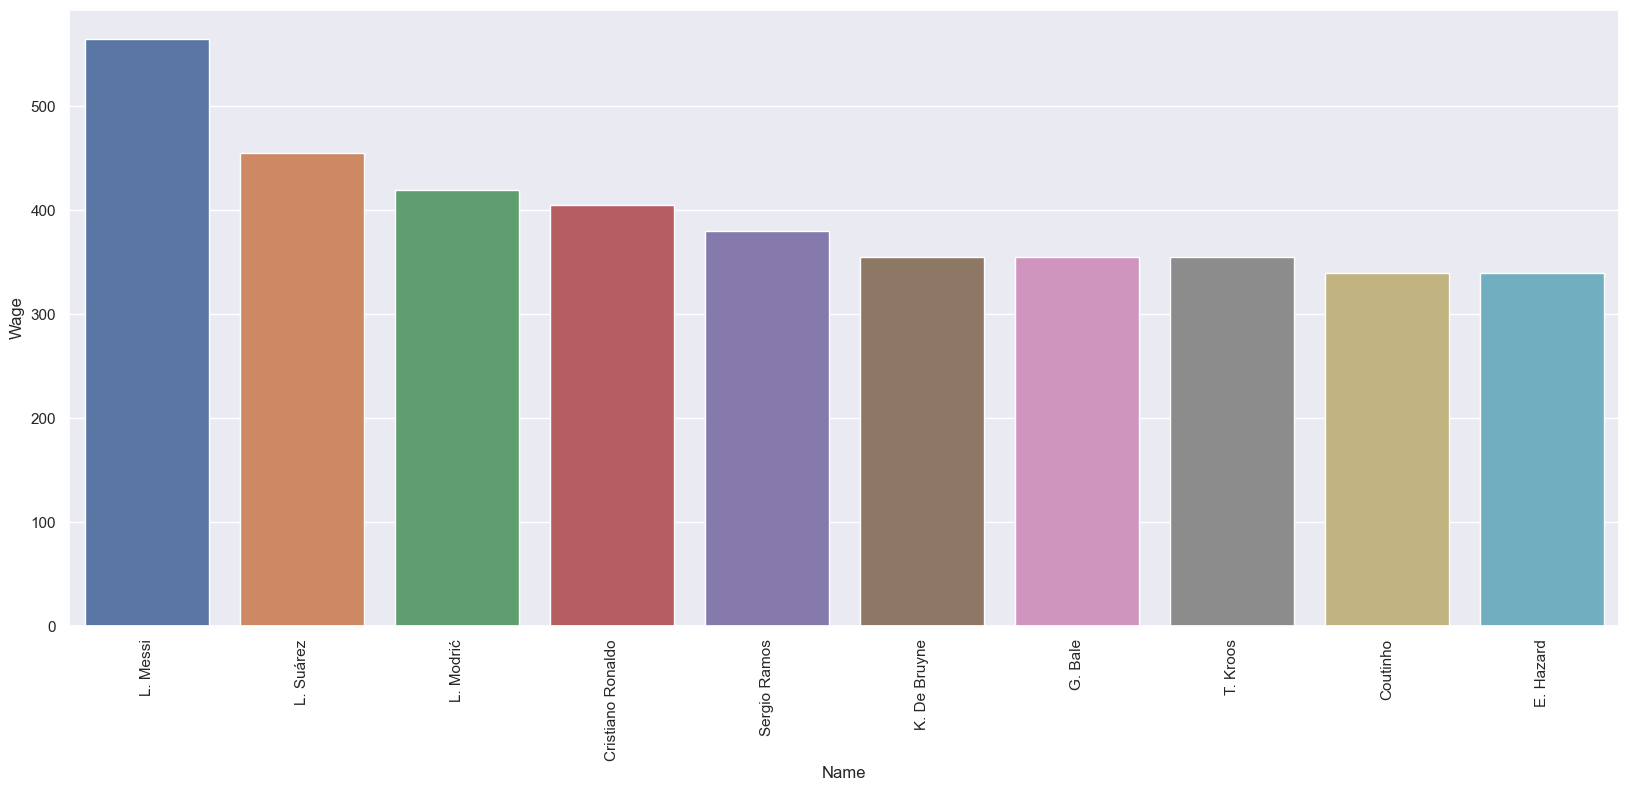

In [58]:
import matplotlib.pyplot as plt
fifa_max_wage = fifa.sort_values(by ='Wage', ascending = 0).head(10)
fig, ax = plt.subplots()
ax1 = sb.barplot(x="Name", y="Wage", data=fifa_max_wage, label="Club")
for item in ax1.get_xticklabels():
    item.set_rotation(90)
# ax2 = sb.catplot(x="Position", y="Wage", data=df_max_wage)
# ax3 = sb.catplot(x="Club", y="Wage", data=df_max_wage).set_xticklabels(rotation=90)

**What is the relation between value, wage and release cause?**

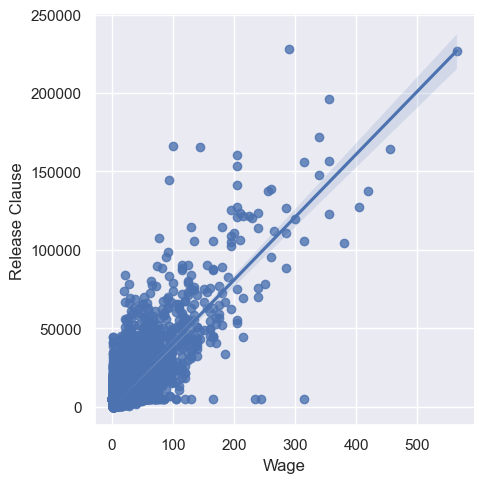

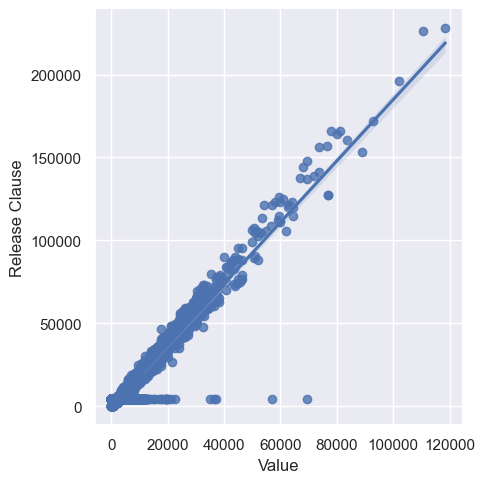

In [59]:
sb.lmplot(x='Wage',y='Release Clause',data=fifa)
sb.lmplot(x='Value',y='Release Clause',data=fifa)

**What nationality has most players?**

In [60]:
fifa_nationality_counts = fifa["Nationality"].value_counts()
fifa_nationality_counts

England                 1655
Germany                 1195
Spain                   1071
Argentina                936
France                   910
                        ... 
New Caledonia              1
Fiji                       1
São Tomé & Príncipe        1
United Arab Emirates       1
Botswana                   1
Name: Nationality, Length: 164, dtype: int64

In [61]:
fifa_nationality_counts.mean()

110.65853658536585

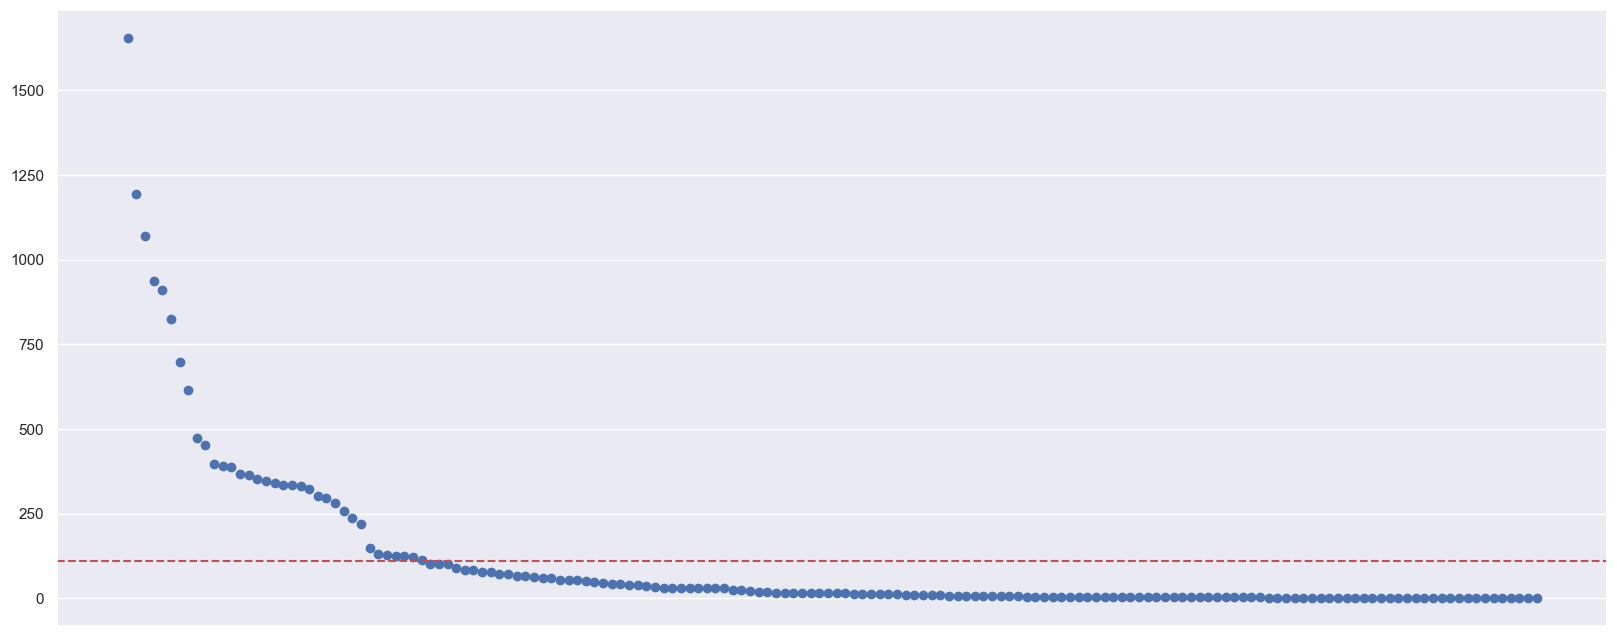

In [62]:
plt.scatter(fifa_nationality_counts.index,fifa_nationality_counts.values)
plt.xticks([])


plt.axhline(y = fifa_nationality_counts.mean(), color = 'r', linestyle = '--')

In [63]:
# As we cannot plot a barchart with 164 points, we will cut on 250 players
fifa_top_nationality_counts = fifa_nationality_counts[fifa_nationality_counts > 250]
fifa_top_nationality_counts

England                1655
Germany                1195
Spain                  1071
Argentina               936
France                  910
Brazil                  824
Italy                   699
Colombia                615
Japan                   475
Netherlands             452
Sweden                  396
China PR                390
Chile                   388
Republic of Ireland     368
Mexico                  365
United States           353
Poland                  348
Norway                  340
Saudi Arabia            336
Denmark                 335
Korea Republic          333
Portugal                322
Turkey                  303
Austria                 296
Scotland                283
Belgium                 259
Name: Nationality, dtype: int64

Text(0.5, 1.0, 'No. of Players by Nations')

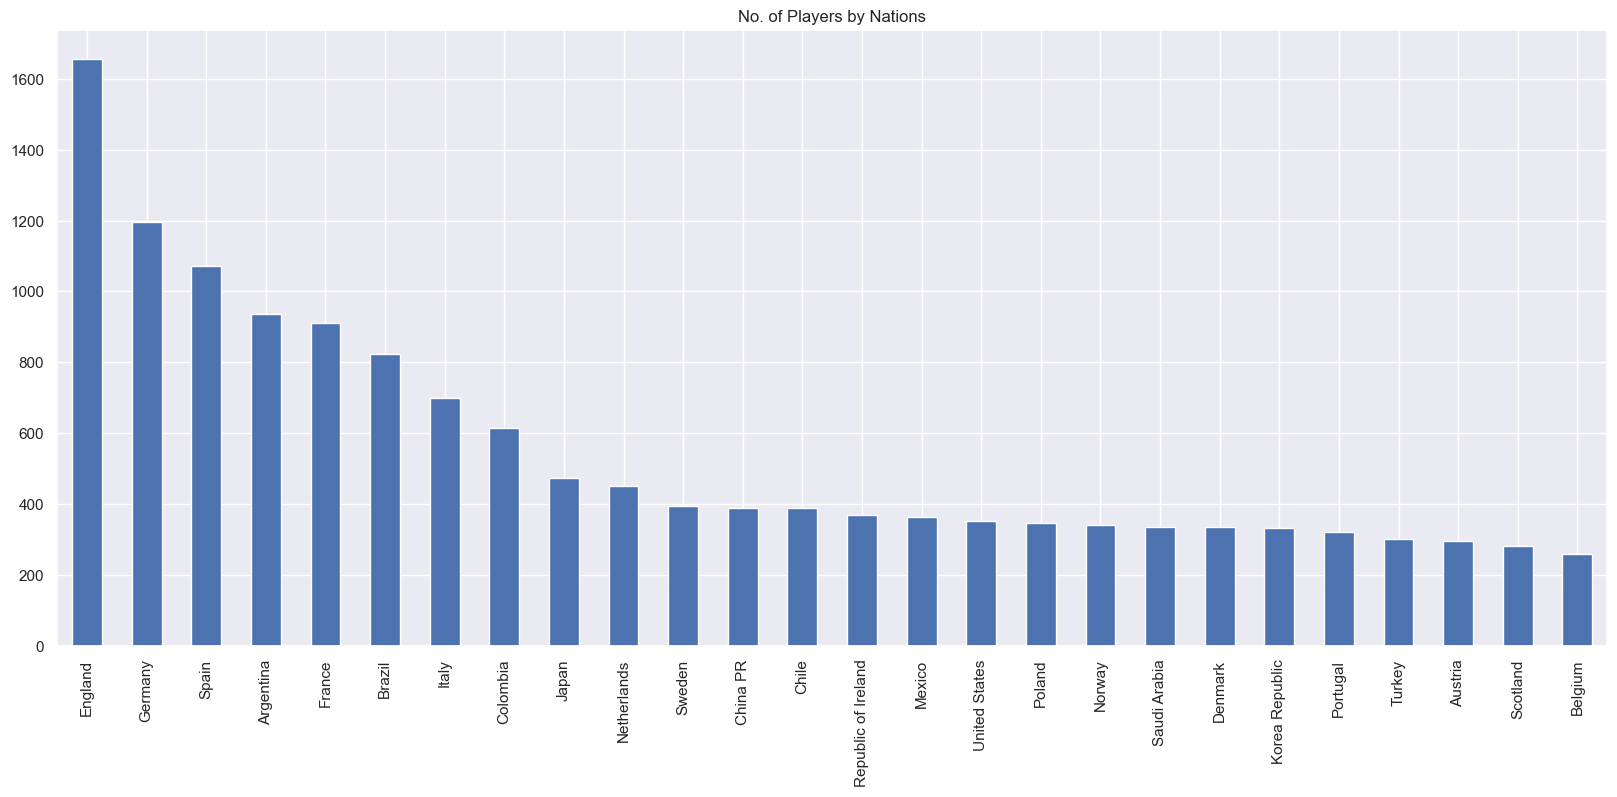

In [64]:
fifa_top_nationality_counts.plot.bar()
plt.title("No. of Players by Nations")

In [65]:
fifa.head()

ID               Name  Age Nationality  Overall  Potential  \
0  158023           L. Messi   31   Argentina       94         94   
1   20801  Cristiano Ronaldo   33    Portugal       94         94   
2  190871          Neymar Jr   26      Brazil       92         93   
3  193080             De Gea   27       Spain       91         93   
4  192985       K. De Bruyne   27     Belgium       91         92   

                  Club     Value   Wage Preferred Foot  \
0         FC Barcelona  110500.0  565.0           Left   
1             Juventus   77000.0  405.0          Right   
2  Paris Saint-Germain  118500.0  290.0          Right   
3    Manchester United   72000.0  260.0          Right   
4      Manchester City  102000.0  355.0          Right   

   International Reputation  Skill Moves Position  Joined  \
0                       5.0          4.0       RF    2004   
1                       5.0          5.0       ST    2018   
2                       5.0          5.0       LW    2017   
3                       4.0          1.0       GK    2011   
4                       4.0          4.0      RCM    2015   

  Contract Valid Until    Height  Weight  Release Clause  
0           2021-01-01  5.583333   159.0        226500.0  
1           2022-01-01  6.166667   183.0        127100.0  
2           2022-01-01  5.750000   150.0        228100.0  
3           2020-01-01  6.333333   168.0        138600.0  
4           2023-01-01  5.916667   154.0        196400.0

**What is the Q1, mean and Q3 wage in a boxplot for the clubs with players with an international reputation higher than 3?**

<AxesSubplot:title={'center':'Wage'}, xlabel='Club'>

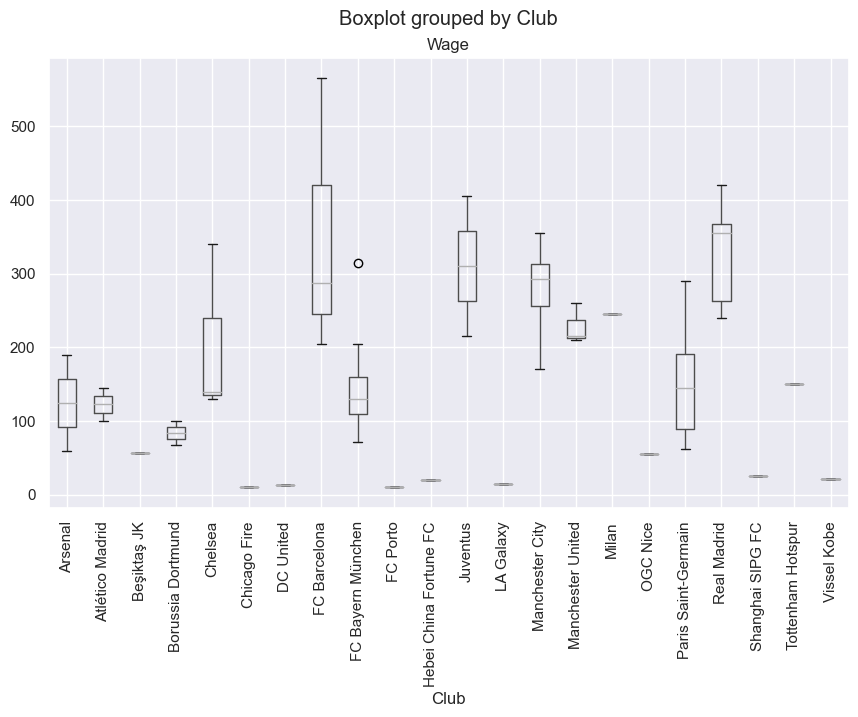

In [66]:
fifa[fifa['International Reputation'] > 3].boxplot(column= 'Wage', by='Club', figsize=(10,6), rot = 90)